In [48]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [106]:
dimension = 1
true_w = np.eye(dimension)
true_var = 1
sigma_prior = np.eye(dimension)

def prior_weight():
    n = np.random.multivariate_normal(np.zeros(dimension), sigma_prior)
    return n

def prior_plot():
    w = prior_weight()
    xs = np.linspace(-2, 2, 100)
    plt.plot(xs, w*xs)
    
def create_data(W, size):
    data = []
    for _ in range(size):
        x = np.random.uniform(-2, 2)
        y = np.dot(W,x)
        data.append([x, y])
    data = np.array(data)
    return data

def posterior_plots(data, y, num):
    for _ in range(num):
        var_inv = 1/true_var
        sigma_inv = np.linalg.inv(sigma_prior)
        A =  var_inv*np.matmul(data, data.T) + sigma_inv
        A_inv = np.linalg.inv(A)
        w_mean = var_inv*np.matmul((A_inv* data), y)
        new_weight = np.random.normal(w_mean, A_inv)
        xs = np.linspace(-2, 2, 100)
        plt.scatter(data, y)
        new_y = new_weight*xs
        plt.plot(xs, new_y[0])

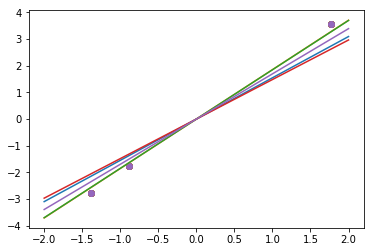

In [125]:
data = create_data(2, 3)
xs = data[:,0]
ys = data[:,1]
posterior_plots(xs, ys, 5)